In [1]:
# =========================================================
# STEP 1.1: Import Libraries for Data Handling
# =========================================================

import pandas as pd      
import numpy as np       


In [2]:
# =========================================================
# STEP 1.2: Import Libraries for Data Visualization
# =========================================================

import matplotlib.pyplot as plt   # Used for basic plots
import seaborn as sns             # Used for advanced statistical plots


In [3]:
# =========================================================
# STEP 1.3: Import Library for Train-Test Split
# =========================================================

from sklearn.model_selection import train_test_split


In [4]:
# =========================================================
# STEP 1.4: Import Libraries for Encoding and Scaling
# =========================================================

from sklearn.preprocessing import LabelEncoder, StandardScaler


In [5]:
# =========================================================
# STEP 1.5: Import Machine Learning Models
# =========================================================

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [6]:
# =========================================================
# STEP 1.6: Import Model Evaluation Metrics
# =========================================================

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [7]:
# =========================================================
# STEP 1.7: Import Utility Libraries
# =========================================================

import warnings
warnings.filterwarnings('ignore')


In [8]:
# =========================================================
# STEP 2: Load Datasets
# =========================================================

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

print("Train Shape :", train_df.shape)
print("Test Shape  :", test_df.shape)
print("Sample Submission Shape:", sample_submission.shape)


Train Shape : (1200000, 21)
Test Shape  : (800000, 20)
Sample Submission Shape: (800000, 2)


In [9]:
# =========================================================
# STEP 3.1: Preview the Dataset
# =========================================================

train_df.head()


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [10]:
train_df.tail()


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,...,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,...,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,...,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0
1199999,1199999,21.0,Female,NaN,Divorced,0.0,PhD,NaN,10.125323,Rural,...,0.0,18.0,502.0,6.0,2020-08-26 15:21:39.155231,Good,Yes,Monthly,House,2480.0


In [11]:
# =========================================================
# STEP 3.2: Dataset Dimensions
# =========================================================

train_df.shape


(1200000, 21)

In [12]:
# =========================================================
# STEP 3.3: Column Names
# =========================================================

train_df.columns


Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [13]:
# =========================================================
# STEP 3.4: Data Types and Missing Values
# =========================================================

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [14]:
# =========================================================
# STEP 3.5: Statistical Summary
# =========================================================

train_df.describe()


,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [15]:
# =========================================================
# STEP 4 : EDA
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')


In [16]:
# =========================================================
# STEP 4.1 : Load Dataset
# =========================================================

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

print("Train Shape:", train_df.shape)
print("Test Shape :", test_df.shape)
print("Sample Submission Shape:", sample_submission.shape)


Train Shape: (1200000, 21)
Test Shape : (800000, 20)
Sample Submission Shape: (800000, 2)


In [17]:
# =========================================================
# STEP 4.2 : Basic Overview
# =========================================================

train_df.head()
train_df.info()
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [18]:
# =========================================================
# STEP 4.3 : Missing Values
# =========================================================

missing = train_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(train_df)) * 100
missing_df = pd.DataFrame({"Missing Count": missing, "Missing %": missing_percent})
missing_df


,Missing Count,Missing %
Previous Claims,364029,30.335750
Occupation,358075,29.839583
Credit Score,137882,11.490167
Number of Dependents,109672,9.139333
Customer Feedback,77824,6.485333
Health Score,74076,6.173000
Annual Income,44949,3.745750
Age,18705,1.558750
Marital Status,18529,1.544083
Vehicle Age,6,0.000500


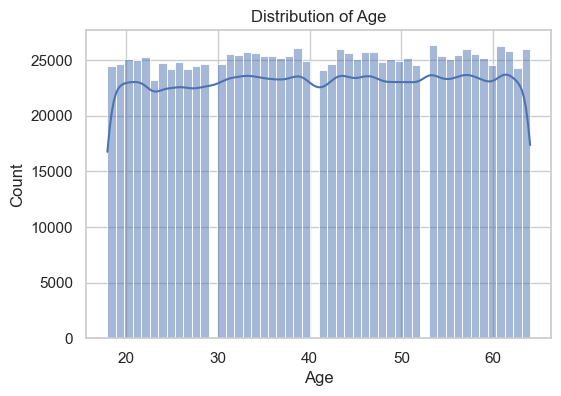

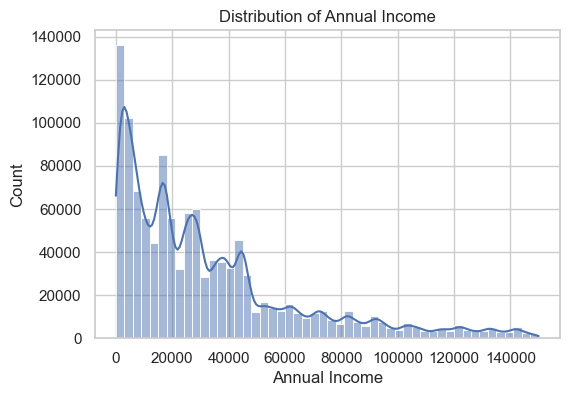

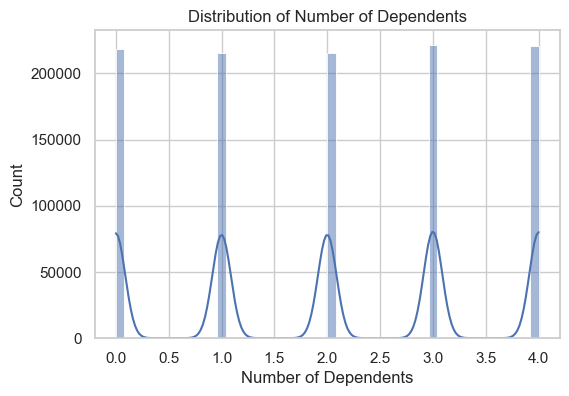

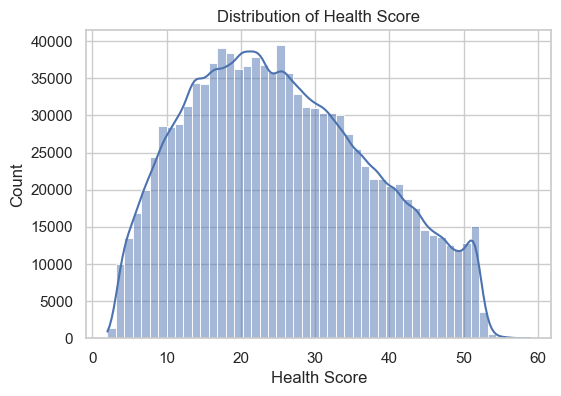

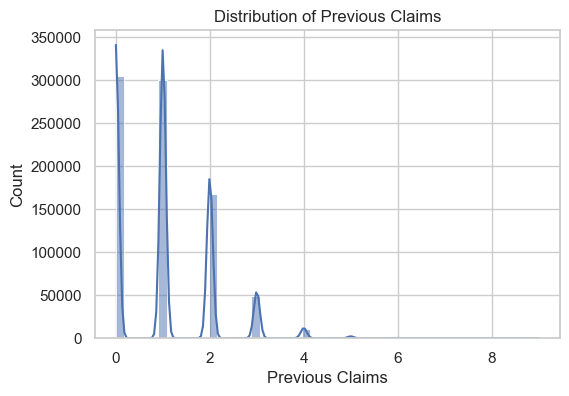

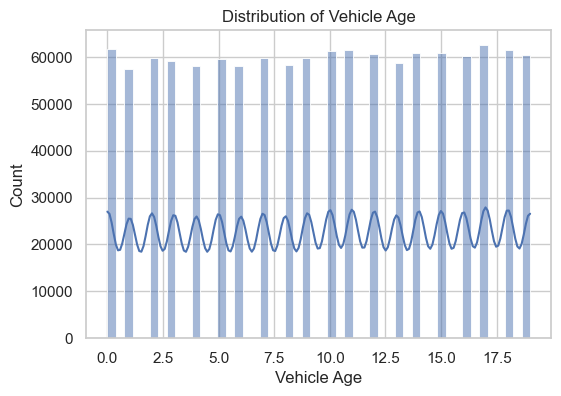

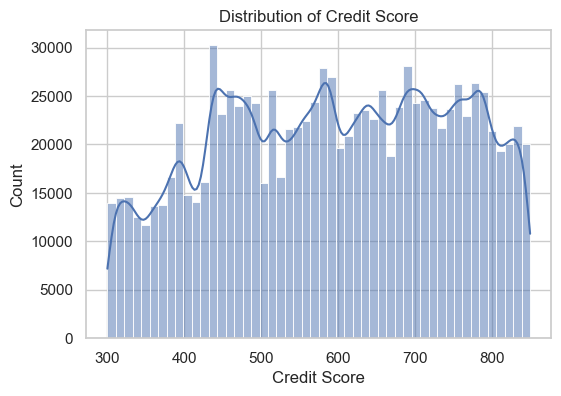

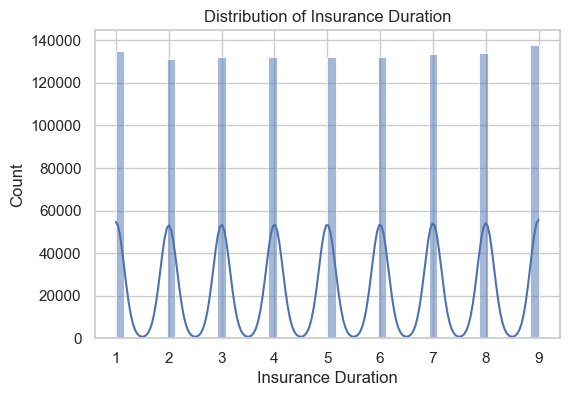

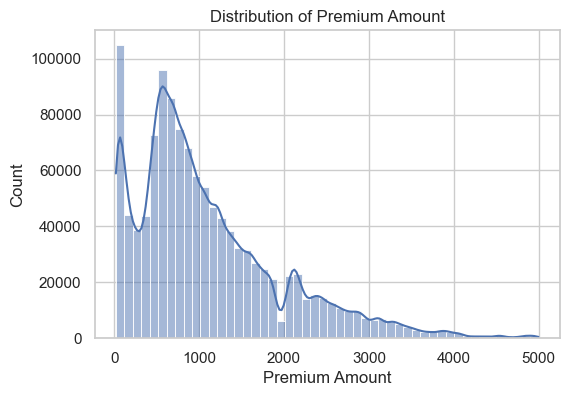

In [19]:
# =========================================================
# STEP 4.4 : Univariate Analysis
# =========================================================

# Numerical Features

numerical_cols = ['Age','Annual Income','Number of Dependents','Health Score',
                  'Previous Claims','Vehicle Age','Credit Score','Insurance Duration','Premium Amount']

target = 'Premium Amount'

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(train_df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


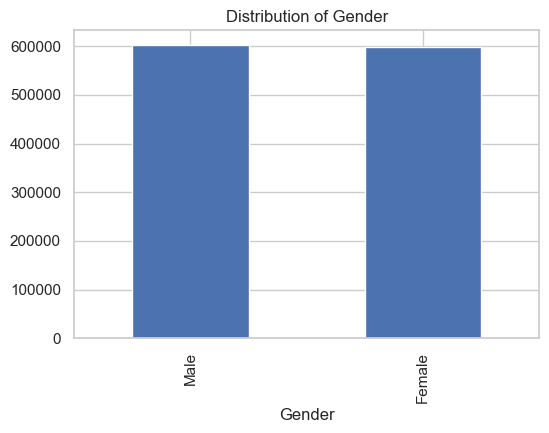

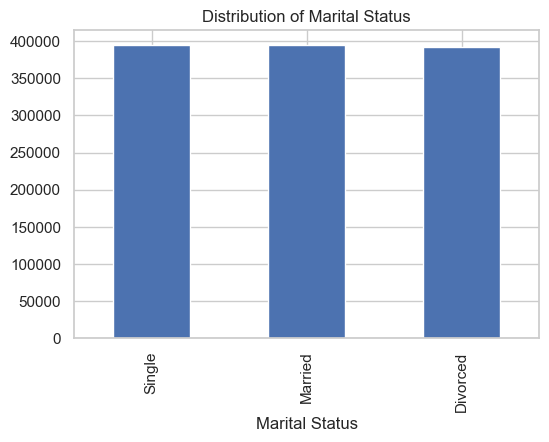

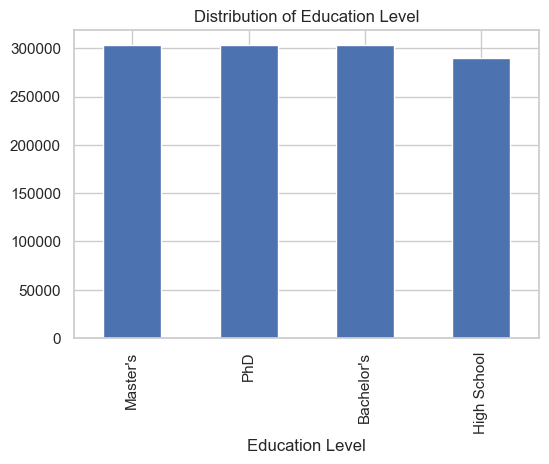

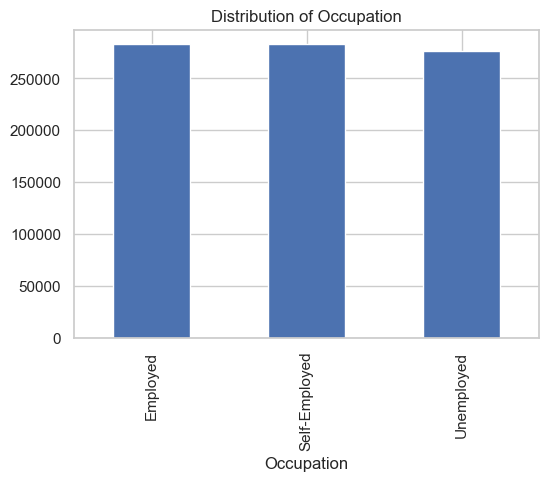

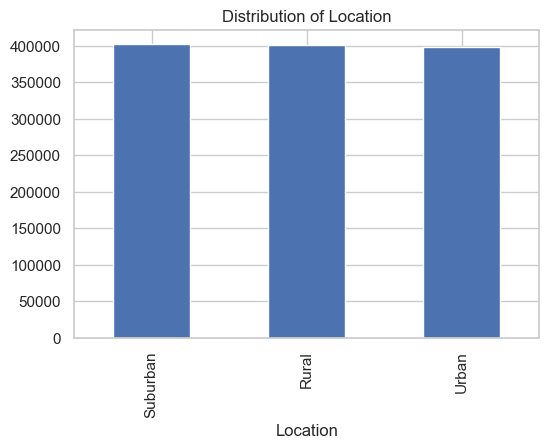

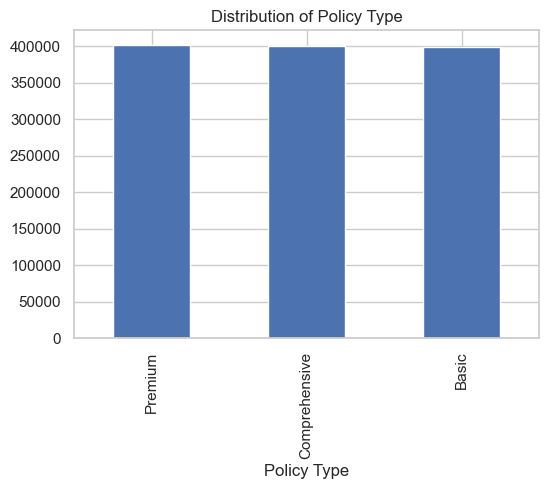

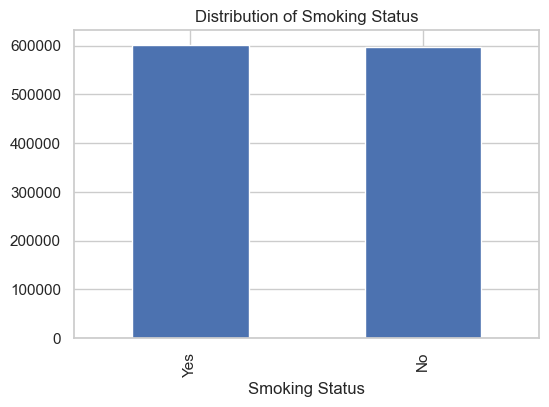

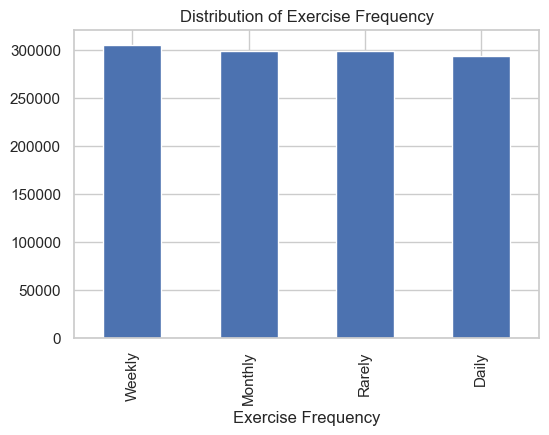

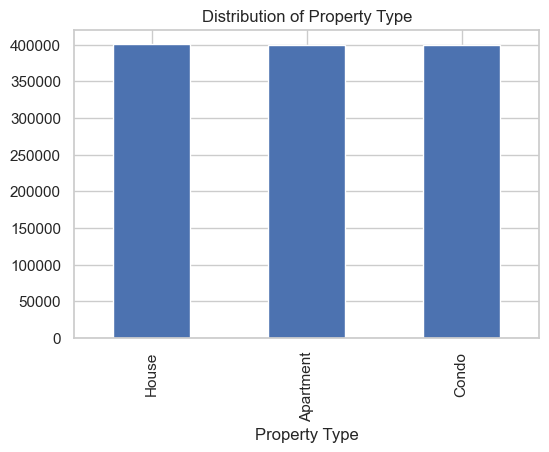

In [20]:
# Categorical Features

categorical_cols = ['Gender','Marital Status','Education Level','Occupation','Location',
                    'Policy Type','Smoking Status','Exercise Frequency','Property Type']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    train_df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()


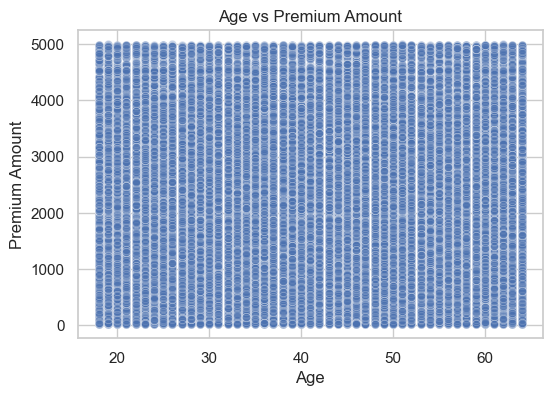

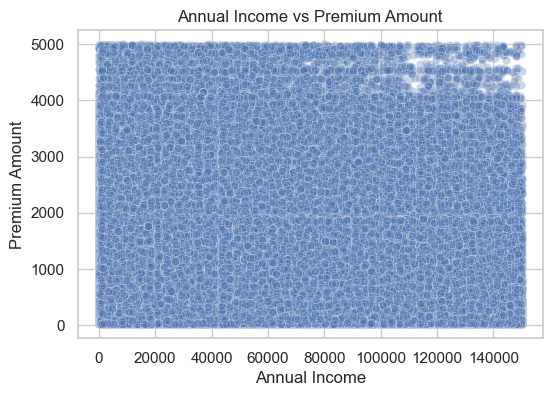

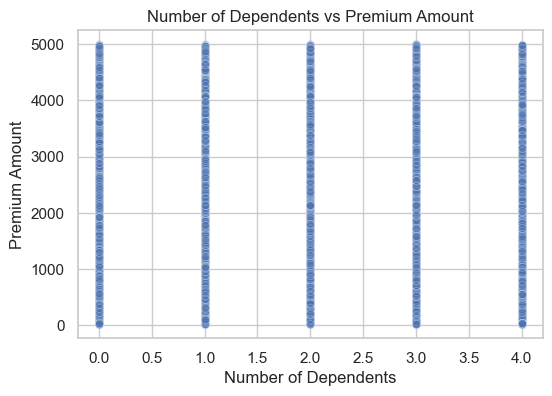

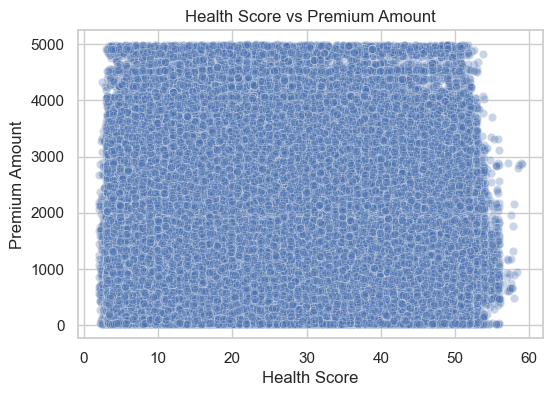

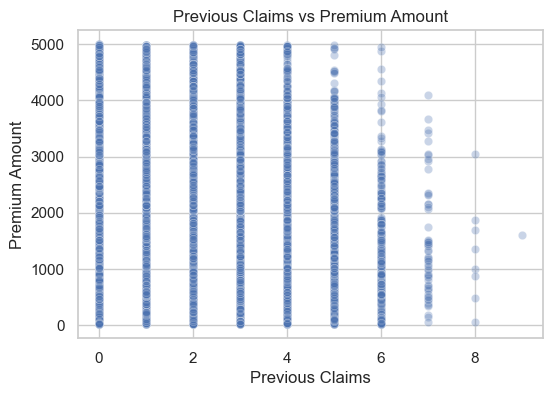

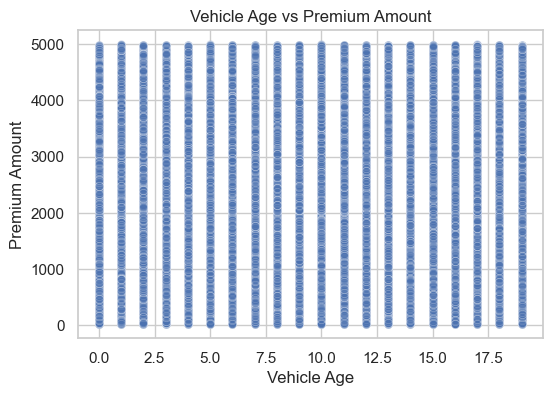

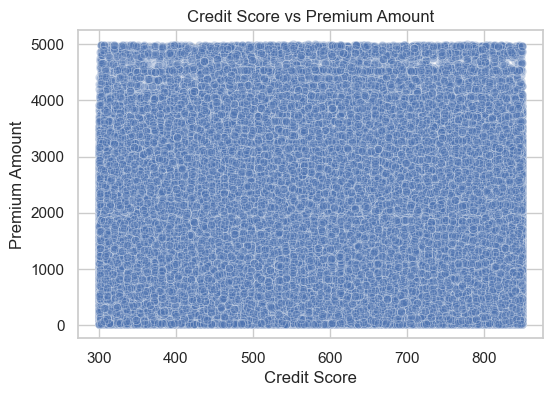

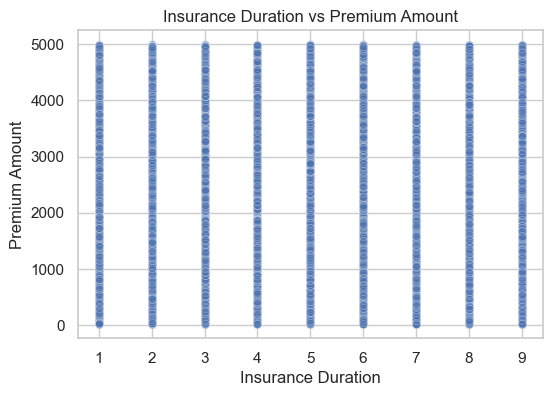

In [21]:
# =========================================================
# STEP 4.5 : Bivariate Analysis
# =========================================================

# Numerical vs Target

for col in numerical_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=train_df[col], y=train_df[target], alpha=0.3)
        plt.title(f"{col} vs {target}")
        plt.show()


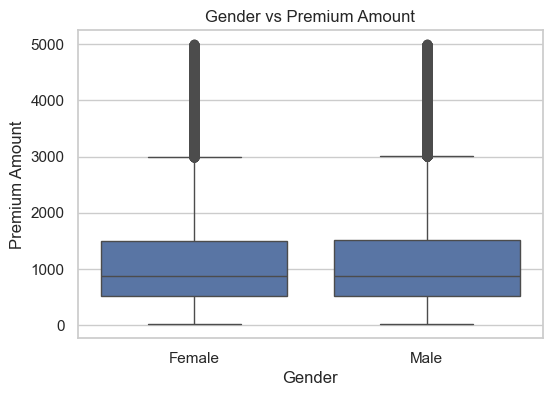

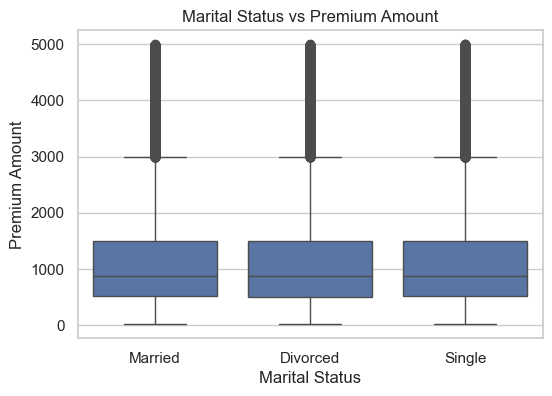

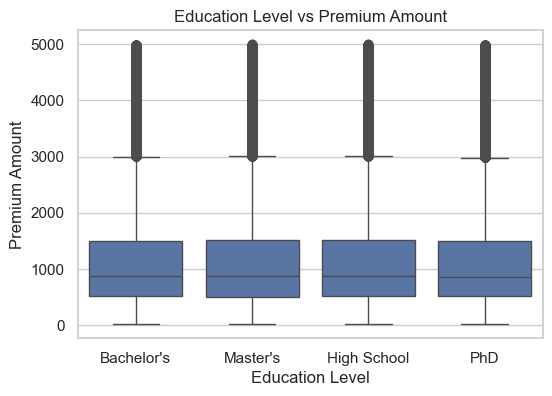

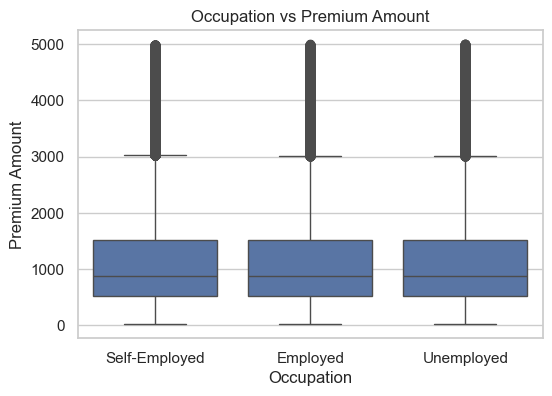

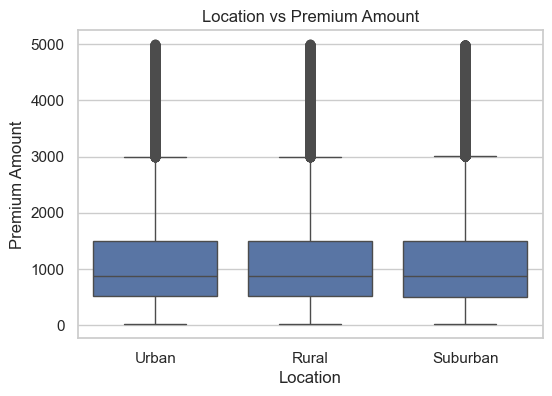

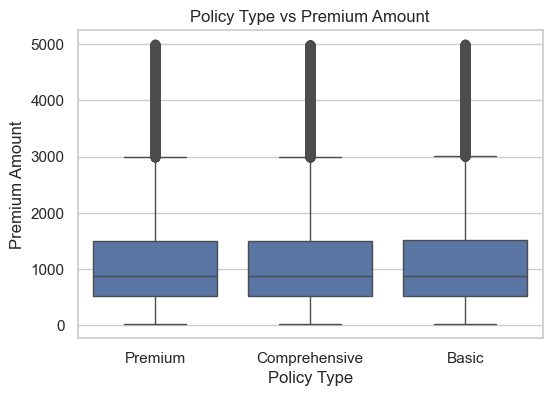

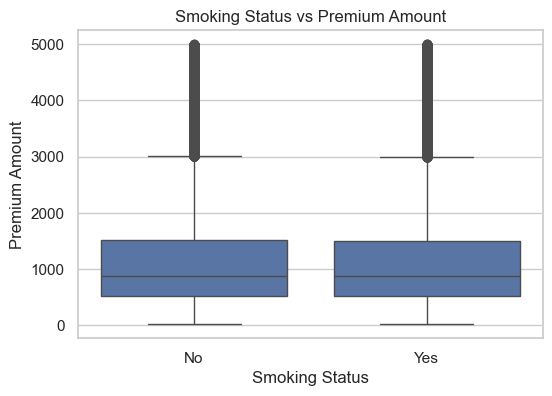

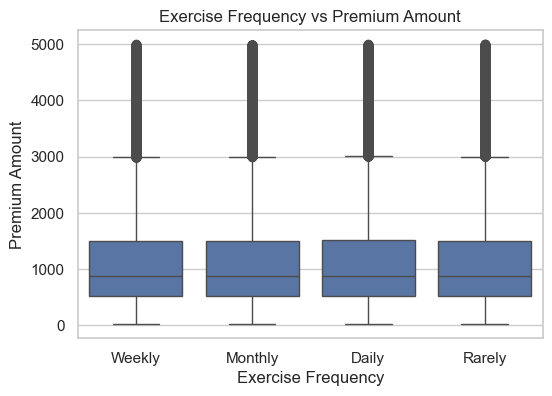

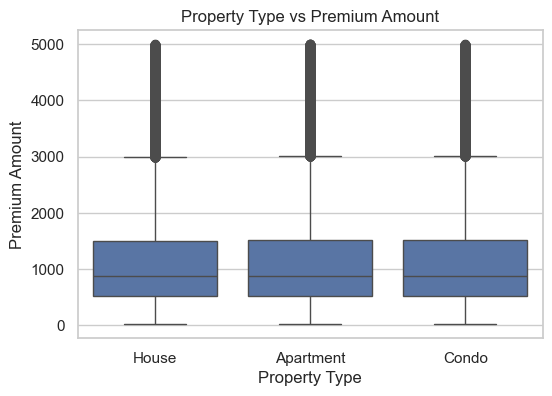

In [22]:
# Categorical vs Target

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train_df[col], y=train_df[target])
    plt.title(f"{col} vs {target}")
    plt.show()


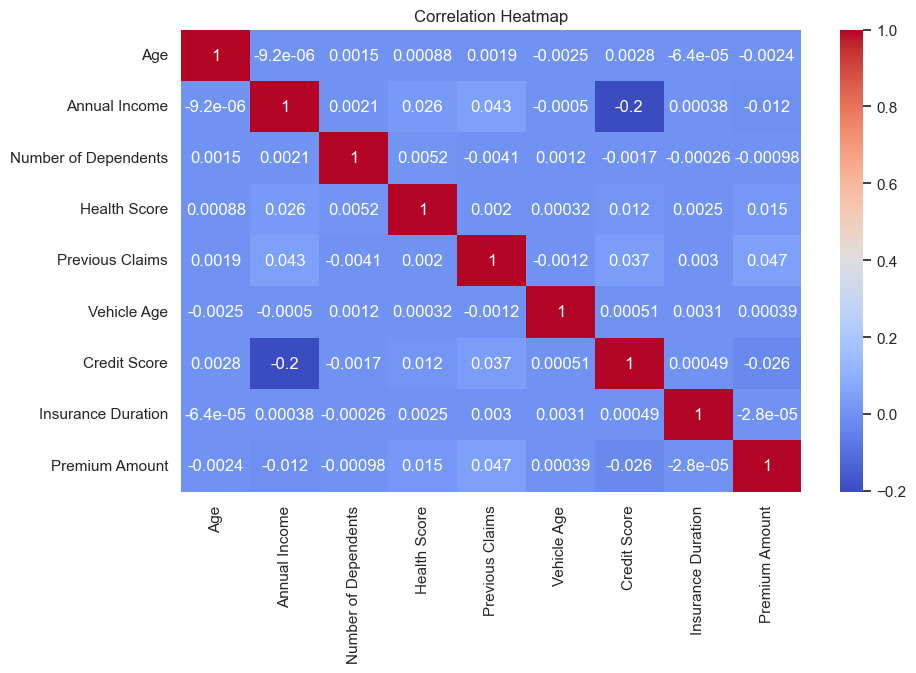

In [23]:
# =========================================================
# STEP 4.6 : Multivariate Analysis
# =========================================================

plt.figure(figsize=(10,6))
corr = train_df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


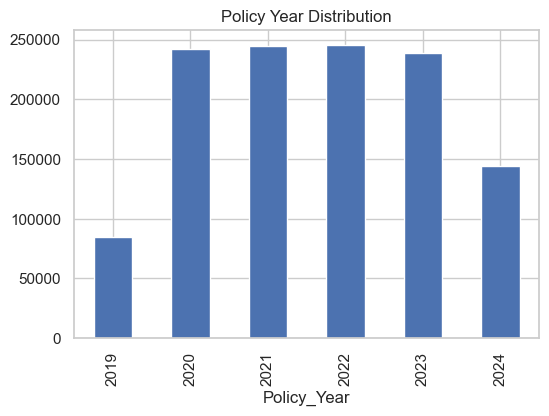

In [24]:
# =========================================================
# STEP 4.7 : Temporal Analysis
# =========================================================

train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date'])
train_df['Policy_Year'] = train_df['Policy Start Date'].dt.year

plt.figure(figsize=(6,4))
train_df['Policy_Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Policy Year Distribution")
plt.show()


In [25]:
# =========================================================
# STEP 4.8 : Duplicate Check
# =========================================================

train_df.duplicated().sum()


0

In [26]:
# -----------------------------
# Step 5: Train-Test Split & Scaling
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")  # to suppress warnings

# Features and Target
target = 'Premium Amount'
features = train_df.drop(columns=['id', target])
y = train_df[target]

# -----------------------------
# 1. Handle missing values
# -----------------------------
numerical_cols = features.select_dtypes(include=np.number).columns
categorical_cols = features.select_dtypes(include='object').columns

# Fill missing numerical values with median
features[numerical_cols] = features[numerical_cols].fillna(features[numerical_cols].median())

# Fill missing categorical values with mode
features[categorical_cols] = features[categorical_cols].fillna(features[categorical_cols].mode().iloc[0])

# -----------------------------
# 2. Encode categorical columns
# -----------------------------
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le  # save for later use

# -----------------------------
# 3. Convert datetime columns to numeric
# -----------------------------
datetime_cols = ['Policy Start Date']  # add other datetime columns if any
for col in datetime_cols:
    features[col] = pd.to_datetime(features[col])
    features[col] = features[col].map(pd.Timestamp.timestamp)

# -----------------------------
# 4. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    features, y, test_size=0.2, random_state=42
)

# -----------------------------
# 5. Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# -----------------------------
# 6. Print Outputs
# -----------------------------
print("Features shape:", features.shape)
print("Target shape  :", y.shape)
print("X_train shape :", X_train.shape)
print("X_test shape  :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape  :", y_test.shape)
print("\nFirst 5 rows of X_train after scaling:")
print(X_train.head())

# Save scaler and encoders for deployment
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')


Features shape: (1200000, 20)
Target shape  : (1200000,)
X_train shape : (960000, 20)
X_test shape  : (240000, 20)
y_train shape : (960000,)
y_test shape  : (240000,)

First 5 rows of X_train after scaling:
             Age  Gender  Annual Income  Marital Status  Number of Dependents  \
404339  0.286586       1       1.862551               0              0.734912   
748487  0.733388       0      -0.858117               1             -0.745674   
435951  0.509987       0       0.281506               0             -1.485967   
311284  0.137652       0      -0.064637               0             -1.485967   
318790 -1.724026       1      -0.617436               1             -0.005381   

        Education Level  Occupation  Health Score  Location  Policy Type  \
404339                0           0      1.553696         2            1   
748487                3           0      1.378426         0            0   
435951                2           0      2.215258         2            1   
31

['label_encoders.pkl']

Linear Regression trained successfully!
MAE: 665.57, RMSE: 865.14, R2: 0.00



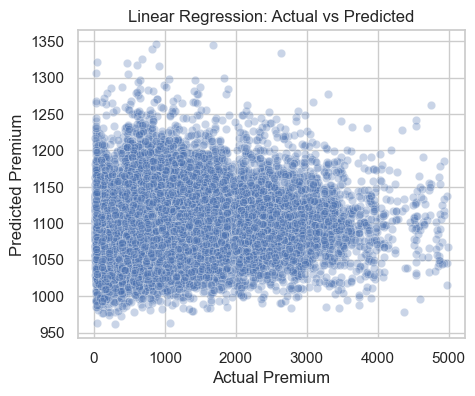

Decision Tree trained successfully!
MAE: 902.75, RMSE: 1239.95, R2: -1.05



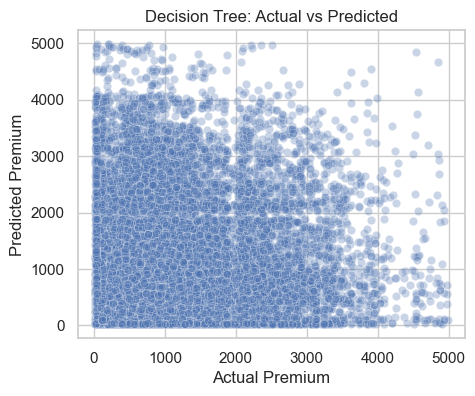

Random Forest trained successfully!
MAE: 664.23, RMSE: 867.90, R2: -0.00



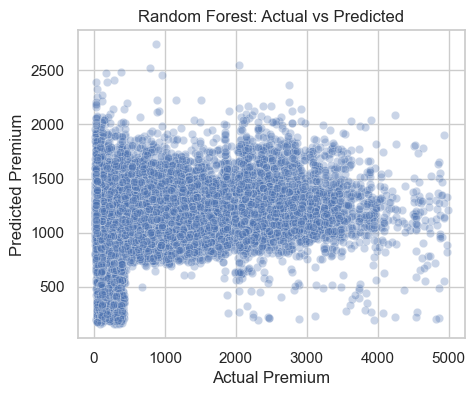

XGBoost trained successfully!
MAE: 648.07, RMSE: 850.65, R2: 0.04



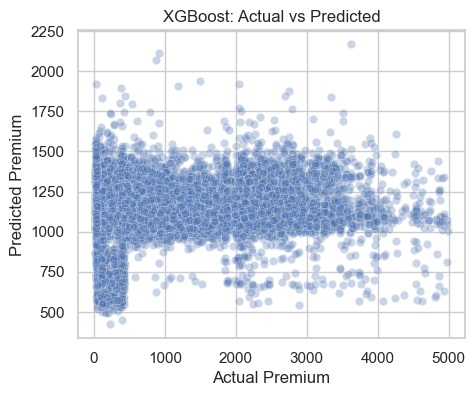

Model Comparison:
               Model         MAE         RMSE  R2_Score
0  Linear Regression  665.571787   865.137766  0.002481
1      Decision Tree  902.746650  1239.946497 -1.049069
2      Random Forest  664.232369   867.898382 -0.003895
3            XGBoost  648.070613   850.647416  0.035616


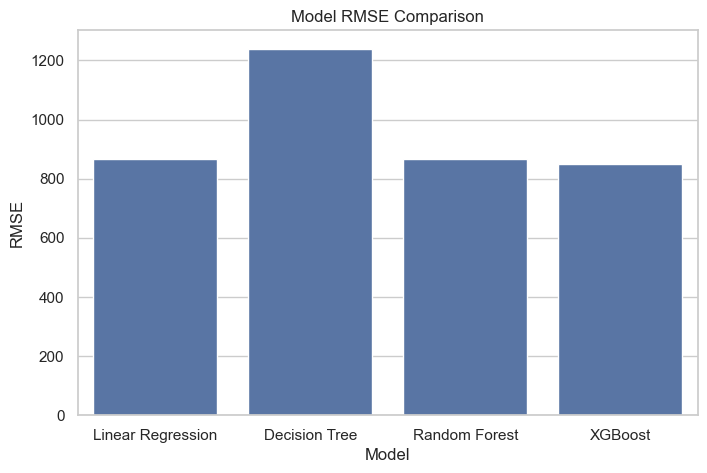

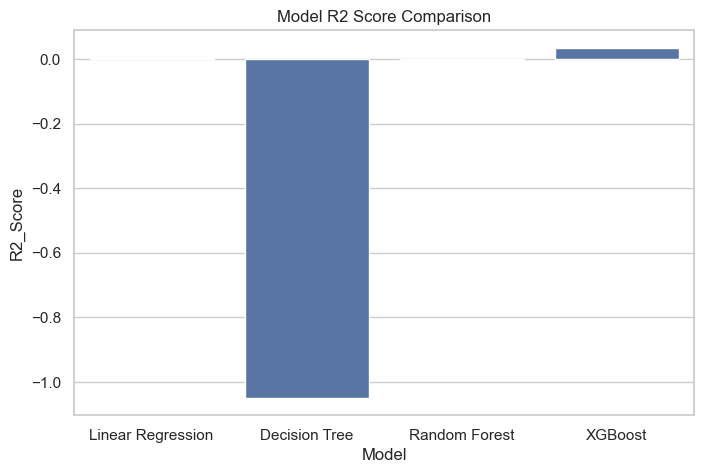

Best model saved: XGBoost


In [27]:
# =========================================================
# STEP 6 : Model Training & Comparison
# =========================================================

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

warnings.filterwarnings("ignore")

# -----------------------------
# Sample data for fast output
# -----------------------------
sample_size = 100000  # 100k rows for quick testing
X_train_sample = X_train[:sample_size]
y_train_sample = y_train[:sample_size]
X_test_sample = X_test[:20000]  # smaller test set
y_test_sample = y_test[:20000]

# -----------------------------
# Define models
# -----------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
}

# -----------------------------
# Train & evaluate on sample
# -----------------------------
results = []
trained_models = {}

for name, model in models.items():
    model.fit(X_train_sample, y_train_sample)
    trained_models[name] = model
    y_pred = model.predict(X_test_sample)
    
    mae = mean_absolute_error(y_test_sample, y_pred)
    rmse = mean_squared_error(y_test_sample, y_pred, squared=False)
    r2 = r2_score(y_test_sample, y_pred)
    
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2_Score": r2})
    
    print(f"{name} trained successfully!")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}\n")
    
    # Scatter plot
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=y_test_sample, y=y_pred, alpha=0.3)
    plt.xlabel("Actual Premium")
    plt.ylabel("Predicted Premium")
    plt.title(f"{name}: Actual vs Predicted")
    plt.show()

# -----------------------------
# Model comparison
# -----------------------------
results_df = pd.DataFrame(results)
print("Model Comparison:")
print(results_df)

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title("Model RMSE Comparison")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2_Score', data=results_df)
plt.title("Model R2 Score Comparison")
plt.show()

# Save best model (lowest RMSE)
best_model_name = results_df.sort_values('RMSE').iloc[0]['Model']
best_model = trained_models[best_model_name]
joblib.dump(best_model, 'final_model.pkl')
print(f"Best model saved: {best_model_name}")


In [29]:
# =========================================================
# STEP 7.1 : Model Pipeline & Modularization
# =========================================================

# Core libraries
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [30]:
# =========================================================
# STEP 7.2 : Define feature columns
# =========================================================

numerical_cols = [
    'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
    'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration'
]

categorical_cols = [
    'Gender', 'Marital Status', 'Education Level', 'Occupation',
    'Location', 'Policy Type', 'Customer Feedback',
    'Smoking Status', 'Exercise Frequency', 'Property Type'
]

print("Numerical Features:", len(numerical_cols))
print("Categorical Features:", len(categorical_cols))


Numerical Features: 8
Categorical Features: 10


In [31]:
# =========================================================
# STEP 7.3 : Create preprocessing pipeline
# =========================================================

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols)
])

print("Preprocessing pipeline created successfully")


Preprocessing pipeline created successfully


In [32]:
# =========================================================
# STEP 7.4 : Create preprocessing pipeline
# =========================================================

pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    ))
])

print("ML Pipeline with XGBoost created")



ML Pipeline with XGBoost created


In [33]:
# =========================================================
# STEP 7.5 : Train the pipeline
# =========================================================

pipeline.fit(X_train, y_train)
print("Pipeline training completed successfully")


Pipeline training completed successfully


In [34]:
# =========================================================
# STEP 7.6 : Evaluate pipeline
# =========================================================

y_pred_pipe = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_pipe)
rmse = mean_squared_error(y_test, y_pred_pipe, squared=False)
r2 = r2_score(y_test, y_pred_pipe)

print("PIPELINE PERFORMANCE")
print("---------------------")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.2f}")


PIPELINE PERFORMANCE
---------------------
MAE  : 647.51
RMSE : 847.54
R2   : 0.04


In [35]:
# =========================================================
# STEP 7.7 : Save FULL PIPELINE
# =========================================================

joblib.dump(pipeline, "smartpremium_pipeline.pkl")
print("Pipeline saved successfully as smartpremium_pipeline.pkl")


Pipeline saved successfully as smartpremium_pipeline.pkl


In [36]:
# -----------------------------
# STEP 8.1: Offline Deployment
# -----------------------------

import joblib
import pandas as pd

# Load trained pipeline
pipeline = joblib.load("smartpremium_pipeline.pkl")

print("Pipeline loaded successfully")

# Create a sample customer input
sample_input = pd.DataFrame({
    "Age": [35],
    "Gender": ["Male"],
    "Annual Income": [650000],
    "Marital Status": ["Married"],
    "Number of Dependents": [2],
    "Education Level": ["Bachelor's"],
    "Occupation": ["Employed"],
    "Health Score": [78],
    "Location": ["Urban"],
    "Policy Type": ["Comprehensive"],
    "Previous Claims": [1],
    "Vehicle Age": [5],
    "Credit Score": [720],
    "Insurance Duration": [3],
    "Policy Start Date": ["2019-05-20"],
    "Customer Feedback": ["Good service"],
    "Smoking Status": ["No"],
    "Exercise Frequency": ["Weekly"],
    "Property Type": ["Apartment"]
})

# Predict premium
predicted_premium = pipeline.predict(sample_input)

print("Predicted Insurance Premium:", round(predicted_premium[0], 2))


Pipeline loaded successfully
Predicted Insurance Premium: 1953.87
